In [74]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib.parse
import json
%matplotlib inline  
matplotlib.style.use('ggplot')

In [29]:
turnover_data = pd.read_csv('datasets/Neighborhood_Turnover_AllHomes.csv')

turnover_data = turnover_data[turnover_data['State'] == 'DC']

turnover_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1998-01,1998-02,1998-03,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01
288,121697,Columbia Heights,Washington,DC,Washington,District of Columbia,289,1.7339,1.9600,2.3935,...,6.9547,6.8113,6.5245,6.6499,6.7933,6.6320,6.6679,6.5424,6.7396,6.6320
361,121685,Capitol Hill,Washington,DC,Washington,District of Columbia,362,3.0808,3.3708,3.7453,...,6.0357,5.9048,5.9405,6.0476,5.8929,5.9286,5.8810,5.7500,5.8452,5.7143
538,121774,Petworth,Washington,DC,Washington,District of Columbia,539,2.2036,2.4376,2.8081,...,5.9351,5.7634,5.5344,5.5534,5.6298,5.7252,5.6870,5.4771,5.2863,5.1527
655,121668,Adams Morgan,Washington,DC,Washington,District of Columbia,656,1.8207,2.0542,2.3343,...,6.1511,6.0256,6.3018,6.4022,6.4775,6.3018,6.2516,6.2265,6.2265,6.0758
669,121806,Washington Highlands,Washington,DC,Washington,District of Columbia,670,0.6944,0.8013,1.0150,...,2.7991,2.8540,2.9089,2.9089,2.9089,2.9638,3.1833,3.1284,3.0735,3.1833


In [93]:
import os
os.listdir('datasets/zillow_data')
zillow_dfs = {}
for fn in os.listdir('datasets/zillow_data'):
    if '.csv' in fn:
        df = pd.read_csv('datasets/zillow_data/%s' % (fn,))
        df = df[df['State'] == 'DC']
        df.index = df['RegionName']
        wanted_cols = []
        for name in df.columns:
            if name[0].isdigit():
                wanted_cols.append(name)
        df = df[wanted_cols]
        zillow_dfs[fn.strip('.csv')] = df
zillow = pd.Panel(zillow_dfs)

In [99]:
print(zillow.axes)
print(zillow.major_axis)
print(zillow.minor_axis)

[Index(['Neighborhood_MedianListingPrice_AllHome',
       'Neighborhood_MedianRentalPricePerSqft_1Bedroom',
       'Neighborhood_MedianRentalPricePerSqft_2Bedroom',
       'Neighborhood_MedianRentalPricePerSqft_3Bedroom',
       'Neighborhood_MedianRentalPricePerSqft_4Bedroom',
       'Neighborhood_MedianRentalPricePerSqft_5BedroomOrMore',
       'Neighborhood_MedianRentalPricePerSqft_Sfr',
       'Neighborhood_MedianRentalPrice_1Bedroom',
       'Neighborhood_MedianRentalPrice_2Bedroom',
       'Neighborhood_MedianRentalPrice_3Bedroom',
       'Neighborhood_MedianRentalPrice_4Bedroom',
       'Neighborhood_MedianRentalPrice_5BedroomOrMore',
       'Neighborhood_MedianRentalPrice_CondoCoop',
       'Neighborhood_MedianRentalPrice_Sfr',
       'Neighborhood_MedianSoldPrice_AllHome',
       'Neighborhood_PctOfHomesIncreasingInValues_AllHome',
       'Neighborhood_Turnover_AllHome'],
      dtype='object'), Index(['Adams Morgan', 'American University Park', 'Anacostia', 'Arboretum',
      

In [98]:
zillow['2016-01']

KeyError: '2016-01'

In [30]:
wanted_cols = []
for label in s.index:
    if label[0].isdigit():
        wanted_cols.append(label)

In [43]:
def plot_neighborhood(name):
    s = turnover_data[turnover_data['RegionName'] == name].copy().squeeze()
    s[wanted_cols].plot(figsize=(15,5))

In [17]:
wanted_cols

['1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '2003-03',
 '2003-04',
 '2003-05',
 '2003-06',
 '2003-07',
 '2003-08',
 '2003-09',
 '2003-10',
 '2003-11',
 '2003-12',
 '2004-01',
 '2004-02',
 '2004-03',
 '2004-04',
 '2004-05',
 '2004-06',
 '2004-07',
 '2004-08',
 '2004-09',
 '2004-10',
 '2004-11',
 '20

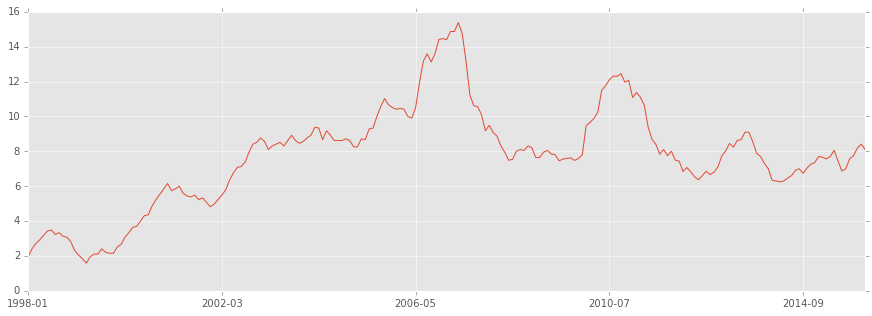

In [46]:
plot_neighborhood('Shaw')

In [72]:
holla = requests.get('http://a.tiles.mapbox.com/v4/governing.l25b5j8b/12/1171/1567.grid.json?access_token=pk.eyJ1IjoiZ292ZXJuaW5nIiwiYSI6Ild1eE5kR0UifQ.1usHvL80cRCFBynkF11O2w')

In [78]:
tract_data = json.loads(holla.text)
for entry_id,field_dict in tract_data['data'].items():
    print(entry_id, field_dict['NAMELSAD'])

18 Census Tract 73.04
26 Census Tract 109
8 Census Tract 65
2 Census Tract 82
22 Census Tract 98.02
12 Census Tract 110
13 Census Tract 64
24 Census Tract 98.10
10 Census Tract 70
7 Census Tract 105
3 Census Tract 81
15 Census Tract 73.01
5 Census Tract 67
14 Census Tract 74.01
1 Census Tract 62.02
9 Census Tract 69
25 Census Tract 98.11
4 Census Tract 66
19 Census Tract 98.03
17 Census Tract 98.04
23 Census Tract 97
16 Census Tract 104
20 Census Tract 98.07
21 Census Tract 98.01
6 Census Tract 102
11 Census Tract 72


In [73]:
holla.text

'{"grid":["             !!!  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####$$","           !!!!!   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#####$$","           !!!!     !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!%%%%&&","            !!!!    !!!!!!!!!!!!!!!\'\'\'\'\'\'\'\'\'\'((((!!!!!!!!!%%%%&&","            !!!!!    !!!!!!!! !!!!!\'\'\'\'\'\'\'\'\'\'(((((!!!!!!!))%%%&&","             !!!!     !!!!!    !!!!\'\'\'\'\'\'\'\'\'\'((((((!!!!!!))))%&&","             !!!!!     !!!!     !!!\'\'\'\'\'\'\'\'\'\'(((((((!)))))))))&*","              !!!!!     !!!!!     !\'\'\'\'\'\'\'\'\'\'(((((((()))))))))+*","              !!!!!!     !!!!  !!!!\'\'\'\'\'\'\'\'\'\'(((((((()))))))++++","               !!!!!!     !!!! !!!!! \'\'\'\'\'\'\'\'((((((((,,,,)++++++","               !!!!!!!     !!!!!!!!!!\'\'\'\'\'\'\'\'((((((((,,,,,,,++++","                    !!!      !!!!!!!!!  \'\'\'\'\'((((((((,,,,,,,,,,+","                    !!!!      !!!!!!!!!  \'\'\'\'\'\'((((((,,,,,,,,,,,","                     !!!!      

In [69]:
api_key = 'X1-ZWz1f6uljmmr63_9d4gz'
zillow_url = 'http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz1f6uljmmr63_9d4gz&state=wa&city=seattle&childtype=neighborhood'
print(zillow_url)
r = requests.get(zillow_url)

http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz1f6uljmmr63_9d4gz&state=wa&city=seattle&childtype=neighborhood


In [70]:
r.status_code

200

In [71]:
r.text

'<?xml version="1.0" encoding="utf-8"?><RegionChildren:regionchildren xsi:schemaLocation="http://www.zillow.com/static/xsd/RegionChildren.xsd http://www.zillowstatic.com/vstatic/9041678/static/xsd/RegionChildren.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:RegionChildren="http://www.zillow.com/static/xsd/RegionChildren.xsd"><request><state>wa</state><city>seattle</city><childtype>neighborhood</childtype></request><message><text>Error: this account is not authorized to execute this API call</text><code>6</code></message></RegionChildren:regionchildren><!-- H:002  T:0ms  S:153  R:Sat Mar 05 08:59:36 PST 2016  B:4.0.25909-master.a723596~hotfix_pre.53ac87d -->'

In [67]:
url2 = 'http://www.zillow.com/webservice/GetDeepComps.htm?zws-id=X1-ZWz1f6uljmmr63_9d4gz&zpid=407624&count=20'
r2 = requests.get(url2)

In [68]:
r2.text

'<?xml version="1.0" encoding="utf-8"?><Comps:comps xsi:schemaLocation="http://www.zillow.com/static/xsd/Comps.xsd http://www.zillowstatic.com/vstatic/9041678/static/xsd/Comps.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:Comps="http://www.zillow.com/static/xsd/Comps.xsd"><request><zpid>407624</zpid><count>20</count></request><message><text>Request successfully processed</text><code>0</code></message><response><properties><principal><zpid>407624</zpid><links><homedetails>http://www.zillow.com/homedetails/1702-10th-St-NW-Washington-DC-20001/407624_zpid/</homedetails><graphsanddata>http://www.zillow.com/homedetails/1702-10th-St-NW-Washington-DC-20001/407624_zpid/#charts-and-data</graphsanddata><mapthishome>http://www.zillow.com/homes/407624_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/407624_zpid/</comparables></links><address><street>1702 10th St NW</street><zipcode>20001</zipcode><city>Washington</city><state>DC</state><latitude>38.912804</latitu